In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

170498071/170498071 [==============================] - 34s 0us/step


In [3]:
# Define a list of optimizers to experiment with
optimizers = {
    'SGD': tf.keras.optimizers.SGD(),
    'Adam': tf.keras.optimizers.Adam(),
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adagrad': tf.keras.optimizers.Adagrad(),
}

In [8]:
optimizer_names = list(optimizers.keys())
accuracy_heatmap = np.zeros((len(optimizer_names), 10))

for i, (name, optimizer) in enumerate(optimizers.items()):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

    accuracy_heatmap[i, :] = history.history['val_accuracy']

Epoch 1/10
391/391 [==============================] - 39s 96ms/step - loss: 2.2529 - accuracy: 0.1553 - val_loss: 2.1376 - val_accuracy: 0.2227
Epoch 2/10
391/391 [==============================] - 41s 105ms/step - loss: 2.0475 - accuracy: 0.2522 - val_loss: 1.9511 - val_accuracy: 0.2955
Epoch 3/10
391/391 [==============================] - 40s 103ms/step - loss: 1.9299 - accuracy: 0.3020 - val_loss: 1.8578 - val_accuracy: 0.3329
Epoch 4/10
391/391 [==============================] - 40s 103ms/step - loss: 1.8160 - accuracy: 0.3514 - val_loss: 1.8607 - val_accuracy: 0.3518
Epoch 5/10
391/391 [==============================] - 40s 101ms/step - loss: 1.6948 - accuracy: 0.3971 - val_loss: 1.6183 - val_accuracy: 0.4261
Epoch 6/10
391/391 [==============================] - 40s 102ms/step - loss: 1.5969 - accuracy: 0.4265 - val_loss: 1.6026 - val_accuracy: 0.4294
Epoch 7/10
391/391 [==============================] - 40s 102ms/step - loss: 1.5217 - accuracy: 0.4553 - val_loss: 1.4841 - val_acc

In [12]:
import random

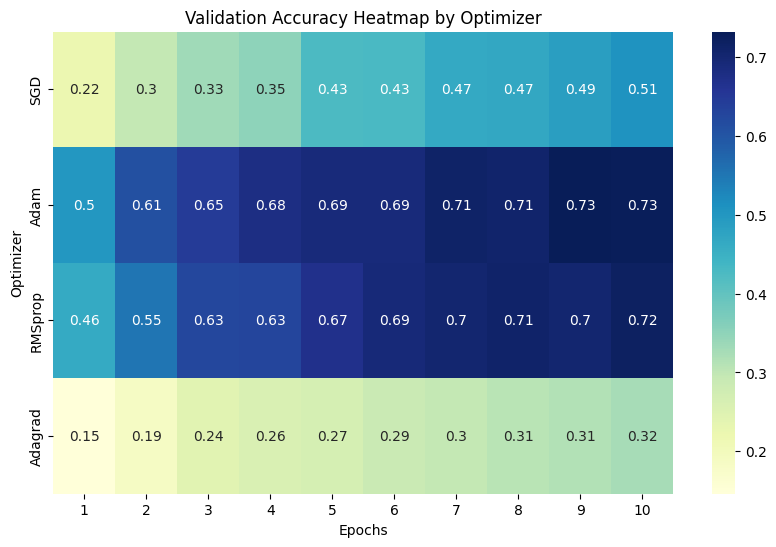

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_heatmap, annot=True, xticklabels=range(1, 11), yticklabels=optimizer_names, cmap="YlGnBu")
plt.xlabel('Epochs')
plt.ylabel('Optimizer')
plt.title('Validation Accuracy Heatmap by Optimizer')
plt.show()

1/1 [==============================] - 0s 28ms/step


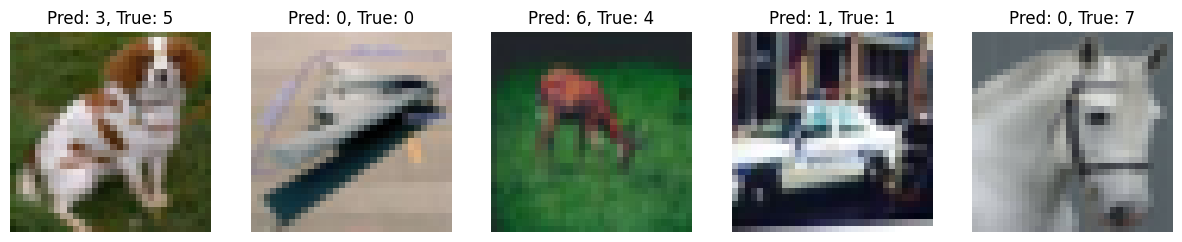

In [16]:
    num_samples = 5
    random_indices = [random.randint(0, len(test_images) - 1) for _ in range(num_samples)]

    plt.figure(figsize=(15, 3))
    for j, index in enumerate(random_indices):
        plt.subplot(1, num_samples, j + 1)
        plt.imshow(test_images[index])
        predicted_label = model.predict(np.expand_dims(test_images[index], axis=0)).argmax()
        true_label = test_labels[index].argmax()
        plt.title(f'Pred: {predicted_label}, True: {true_label}')
        plt.axis('off')
    plt.show()